# STEP #0: PROBLEM STATEMENT  


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>



- Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

- The 10 classes are as follows:  
  - 0 => T-shirt/top
  - 1 => Trouser
  - 2 => Pullover
  - 3 => Dress
  - 4 => Coat
  - 5 => Sandal
  - 6 => Shirt
  - 7 => Sneaker
  - 8 => Bag
  - 9 => Ankle boot

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.


# STEP #1: IMPORT LIBRARIES

In [44]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
tf.__version__

'2.15.0'

# STEP #2: LOAD DATASET

In [46]:
# Alternatively, you can use the same dataset made readily available by keras Using the following lines of code:
#training, testing = tf.keras.datasets.fashion_mnist.load_data()

In [47]:
train_df=pd.read_csv("fashion-mnist_train.csv")
test_df=pd.read_csv("fashion-mnist_test.csv")

# STEP #3: DATA VISUALIZATION

In [48]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Let's view the last elements in the training dataset
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Let's view the head of the testing dataset
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Let's view the last elements in the testing dataset
test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [52]:
train_df.shape

(60000, 785)

In [53]:
test_df.shape

(10000, 785)

In [54]:
training=train_df.values

In [55]:
testing=test_df.values

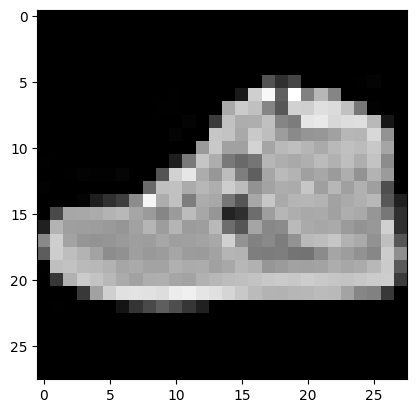

In [56]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [57]:
label = training[i,0]
label


9

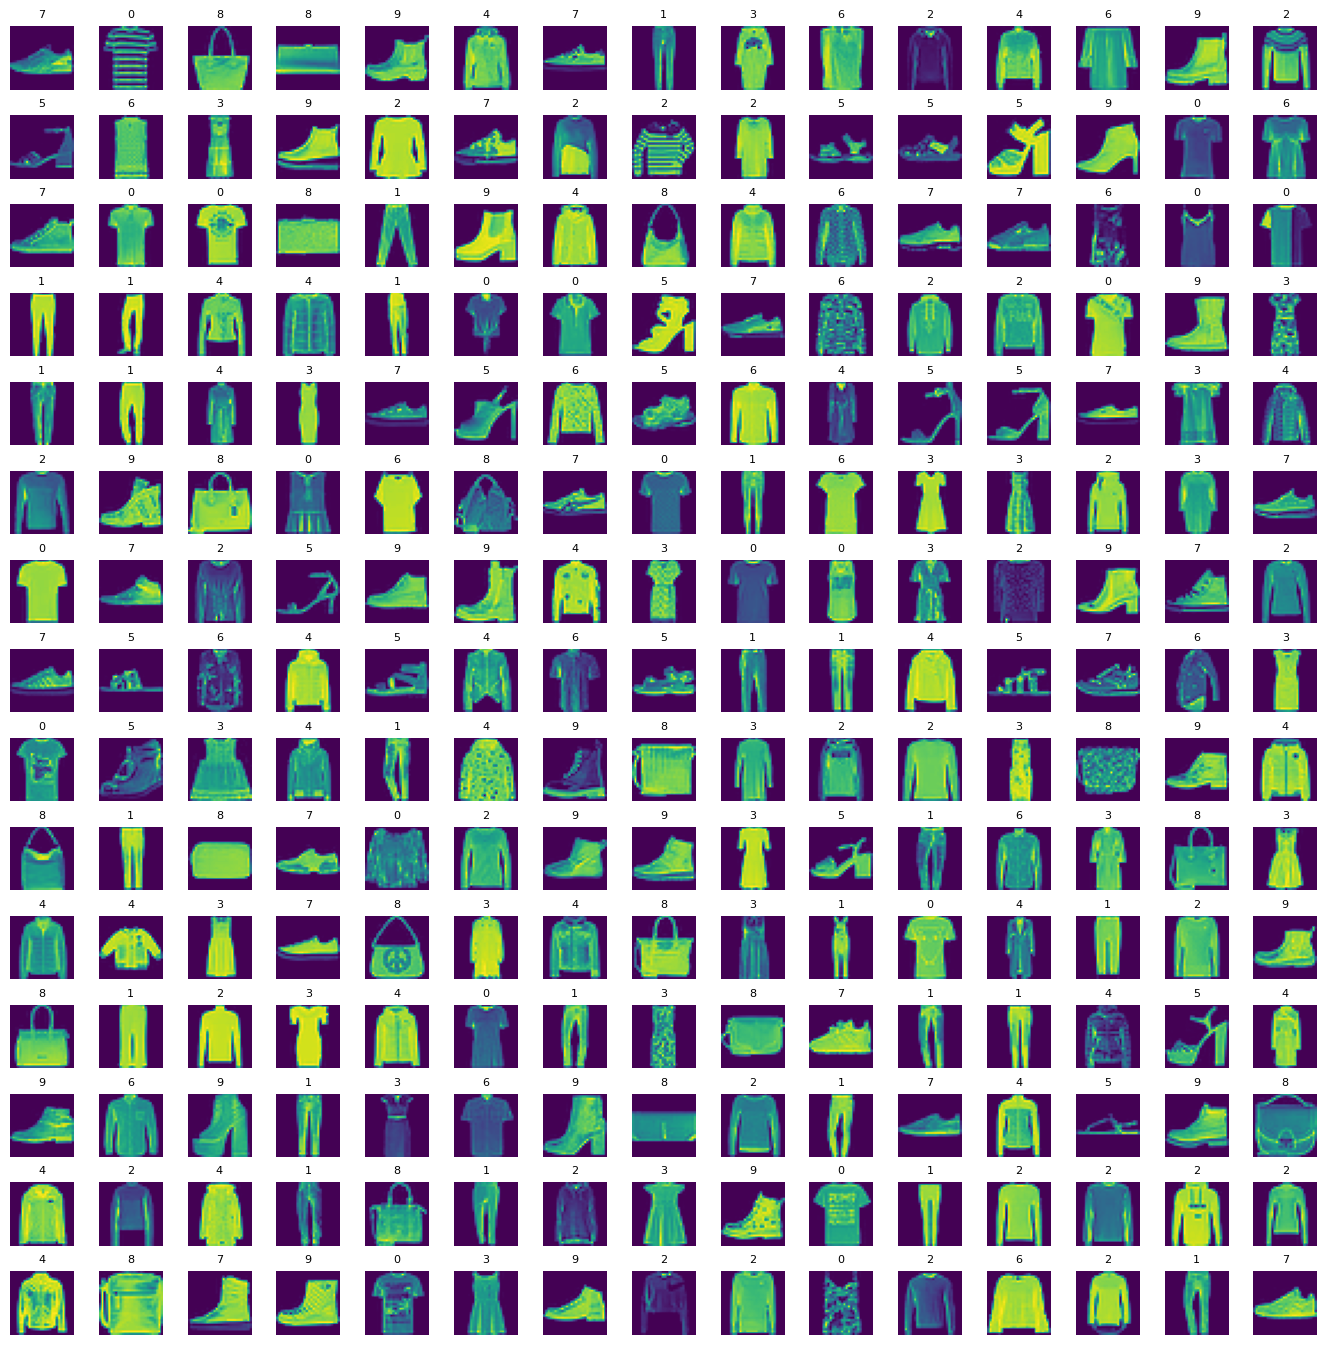

In [58]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# STEP#4: BUILD AND TRAIN A DEEP LEARNING MODEL

In [59]:
# Prepare the training and testing dataset
X_train=train_df.iloc[:,1:].values/255
y_train=train_df["label"]
X_test=test_df.iloc[:,1:].values/255
y_test=test_df["label"]

In [60]:
#from sklearn.model_selection import train_test_split

#X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [61]:
X_train.shape

(60000, 784)

In [62]:
y_train.shape

(60000,)

In [63]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
#X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [64]:
X_train.shape

(60000, 28, 28, 1)

In [65]:
X_test.shape

(10000, 28, 28, 1)

In [66]:
model = tf.keras.Sequential()

In [67]:
#0X_validate.shape
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())

# Each fully connected has half its input as its number of neurons.
model.add(tf.keras.layers.Dense(64, activation='relu'))

# 10 neurons in the last layer as we have 10 classes.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [69]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')

In [70]:
epoch_hist=model.fit(X_train,y_train,epochs=150)

Epoch 1/150
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5049
Epoch 2/150
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3288
Epoch 3/150
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2817
Epoch 4/150
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2540
Epoch 5/150
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2322
Epoch 6/150
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2132
Epoch 7/150
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1969
Epoch 8/150
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1830
Epoch 9/150
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1709
Epoch 10/150
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1577
Epoch 11/150
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1470
Epoch 12/150
1875/1875 [==============================] - 9s 5ms/step - l

# STEP #5: EVALUATE THE MODEL

In [71]:

model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 1.4124


1.4123947620391846

In [72]:
# get the predictions for the test data
predicted_classes = model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,axis=1)

313/313 [==============================] - 1s 3ms/step


In [73]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

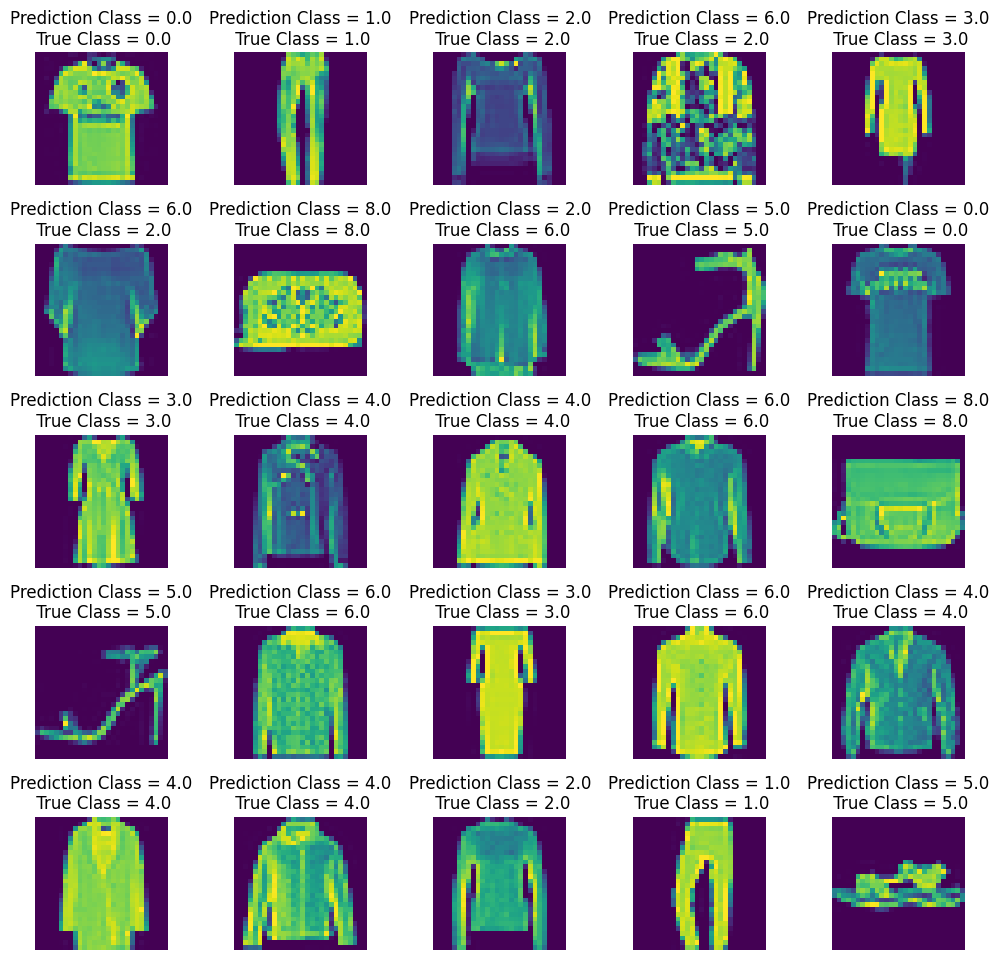

In [74]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


<Axes: >

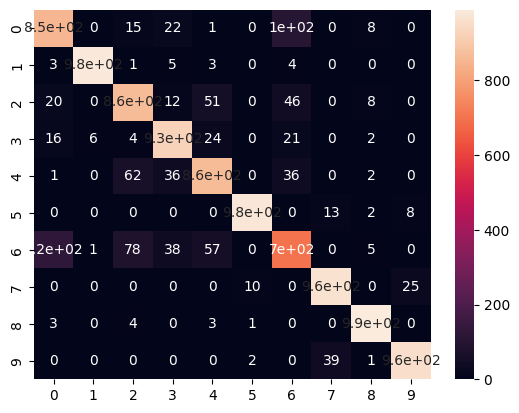

In [75]:
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True)

In [76]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.86      0.85      1000
           3       0.89      0.93      0.91      1000
           4       0.86      0.86      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.77      0.70      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# GREAT JOB!

In [77]:
model.save('clothing_cnn.h5')

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
model.save('clothing_cnn.keras')

In [78]:
model.save_weights('clothing_cnn_weights.h5')

In [80]:
model.save_weights('clothing_cnn_weights.keras')